In [1]:
import numpy as np
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import nltk


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Tweets.csv')
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
data['airline_sentiment_gold'].unique()

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

In [5]:
data = data[['airline_sentiment','text']]
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [7]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [8]:
data['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rs= RandomUnderSampler(random_state=42)
data[['text']],data['airline_sentiment'] = rs.fit_resample(data[['text']],data['airline_sentiment'])

In [10]:
data['airline_sentiment'].value_counts()

airline_sentiment
neutral     2363
positive    2363
negative    2363
Name: count, dtype: int64

In [11]:
data = data.dropna()
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
14632,neutral,"“@AmericanAir: @TilleyMonsta George, that does..."
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...


In [12]:
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = stopwords.words("english")
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens


# Apply preprocessing to the text data
data['tokens'] = data['text'].apply(preprocess_text)
data

,airline_sentiment,text,tokens
0,neutral,@VirginAmerica What @dhepburn said.,"[virginamerica, dhepburn, said]"
1,positive,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, youve, added, commercial..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, didnt, today, must, mean, need..."
3,negative,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn..."
6,positive,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, yes, nearly, every, time, fly,..."
...,...,...,...
14632,neutral,"“@AmericanAir: @TilleyMonsta George, that does...","[americanair, tilleymonsta, george, doesnt, lo..."
14635,positive,@AmericanAir thank you we got on a different f...,"[americanair, thank, got, different, flight, c..."
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,"[americanair, leaving, minutes, late, flight, ..."
14637,neutral,@AmericanAir Please bring American Airlines to...,"[americanair, please, bring, american, airline..."


In [13]:
# Train Word2Vec model
from gensim.models import Word2Vec
model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, sg=1)

In [14]:
# Get the list of words in the vocabulary
vocabulary_list = list(model.wv.index_to_key)

# Print the vocabulary
print(len(vocabulary_list))
vocabulary_list

9398


['united',
 'flight',
 'jetblue',
 'southwestair',
 'americanair',
 'usairways',
 'thanks',
 'get',
 'thank',
 'service',
 'help',
 'virginamerica',
 'cancelled',
 'im',
 'time',
 'flights',
 'customer',
 'us',
 'please',
 'amp',
 'great',
 'would',
 'need',
 'got',
 'cant',
 'still',
 'one',
 'plane',
 'back',
 'guys',
 'today',
 'gate',
 'like',
 'fly',
 'know',
 'hold',
 'hours',
 'love',
 'bag',
 'flightled',
 'good',
 'airline',
 'dont',
 'flying',
 'way',
 'call',
 'much',
 'delayed',
 'airport',
 'phone',
 'dm',
 'home',
 'new',
 'tomorrow',
 'make',
 'change',
 'best',
 'go',
 'late',
 'day',
 'see',
 'hour',
 'u',
 'weather',
 'first',
 'going',
 'last',
 'check',
 'really',
 'yes',
 'aa',
 'crew',
 'well',
 'work',
 'seat',
 'another',
 'getting',
 'next',
 'take',
 'travel',
 'trying',
 'wait',
 'waiting',
 'could',
 'made',
 'email',
 'ticket',
 'number',
 'even',
 'ive',
 'awesome',
 'right',
 'fleek',
 'want',
 'bags',
 'sent',
 'fleets',
 'delay',
 'thats',
 'trip',
 'ne

In [15]:
data['tokens'][0]

['virginamerica', 'dhepburn', 'said']

In [16]:
def get_sentence_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(100)
    return np.mean(word_vectors, axis=0)

# Create sentence vectors
data['sentence_vector'] = data['tokens'].apply(lambda tokens: get_sentence_vector(tokens, model))
X = np.vstack(data['sentence_vector'])



In [17]:
# enoding of output(airline_sentiment)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['airline_sentiment_en'] = le.fit_transform(data['airline_sentiment'])

Y = data['airline_sentiment_en']
Y

0        1
1        2
2        1
3        0
6        2
        ..
14632    1
14635    2
14636    0
14637    1
14639    1
Name: airline_sentiment_en, Length: 7089, dtype: int32

In [18]:
len(data['sentence_vector'][0])

100

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lor_model = LogisticRegression()
lor_model.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score
ypred_train_lor= lor_model.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train_lor))

from sklearn.model_selection import cross_val_score
print('cv score : ',cross_val_score(lor_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test_lor = lor_model.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test_lor))


train_accuracy :  0.612237700581908
cv score :  0.6053568903495482
test_accuracy :  0.5881523272214386


# KNN

In [23]:
# Model
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

# Parameter & Values
param_grid = {'n_neighbors':list(range(1,50)),'p':[1,2]}

# Identifying the best value of the parameter(n_neighbors & p) within the given values for the given data.
# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Calculate n_neighbors & p_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

# directly created final knn model
knn_model = model_hyprtu.best_estimator_

# printing that n_neighbors & p_value
model_hyprtu.best_params_


{'n_neighbors': 30, 'p': 2}

In [24]:
knn_model = model_hyprtu.best_estimator_
knn_model.fit(X_train,Y_train)

ypred_train_knn = knn_model.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train_knn))

print('cv score : ',cross_val_score(knn_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test_knn = knn_model.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test_knn))


train_accuracy :  0.6238758596367484
cv score :  0.5972463464093419
test_accuracy :  0.57475317348378


# SVM

In [25]:
from sklearn.svm import SVC
estimator = SVC()

# Parameter & Values
param_grid = {'C':[0,0.01,0.1,1,2,3,4,5],'kernel':['linear','rbf','sigmoid','poly']}

# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

# directly created final svm model
svm_model = model_hyprtu.best_estimator_

# printing that alpha_value
model_hyprtu.best_params_


{'C': 5, 'kernel': 'linear'}

In [26]:
svm_model = model_hyprtu.best_estimator_
svm_model.fit(X_train,Y_train)

ypred_train_svm = svm_model.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train_svm))

print('cv score : ',cross_val_score(svm_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test_svm = lor_model.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test_svm))


train_accuracy :  0.6330453182860166
cv score :  0.6252813711550862
test_accuracy :  0.5881523272214386


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtre_model = DecisionTreeClassifier(random_state=True)
dtre_model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=True)

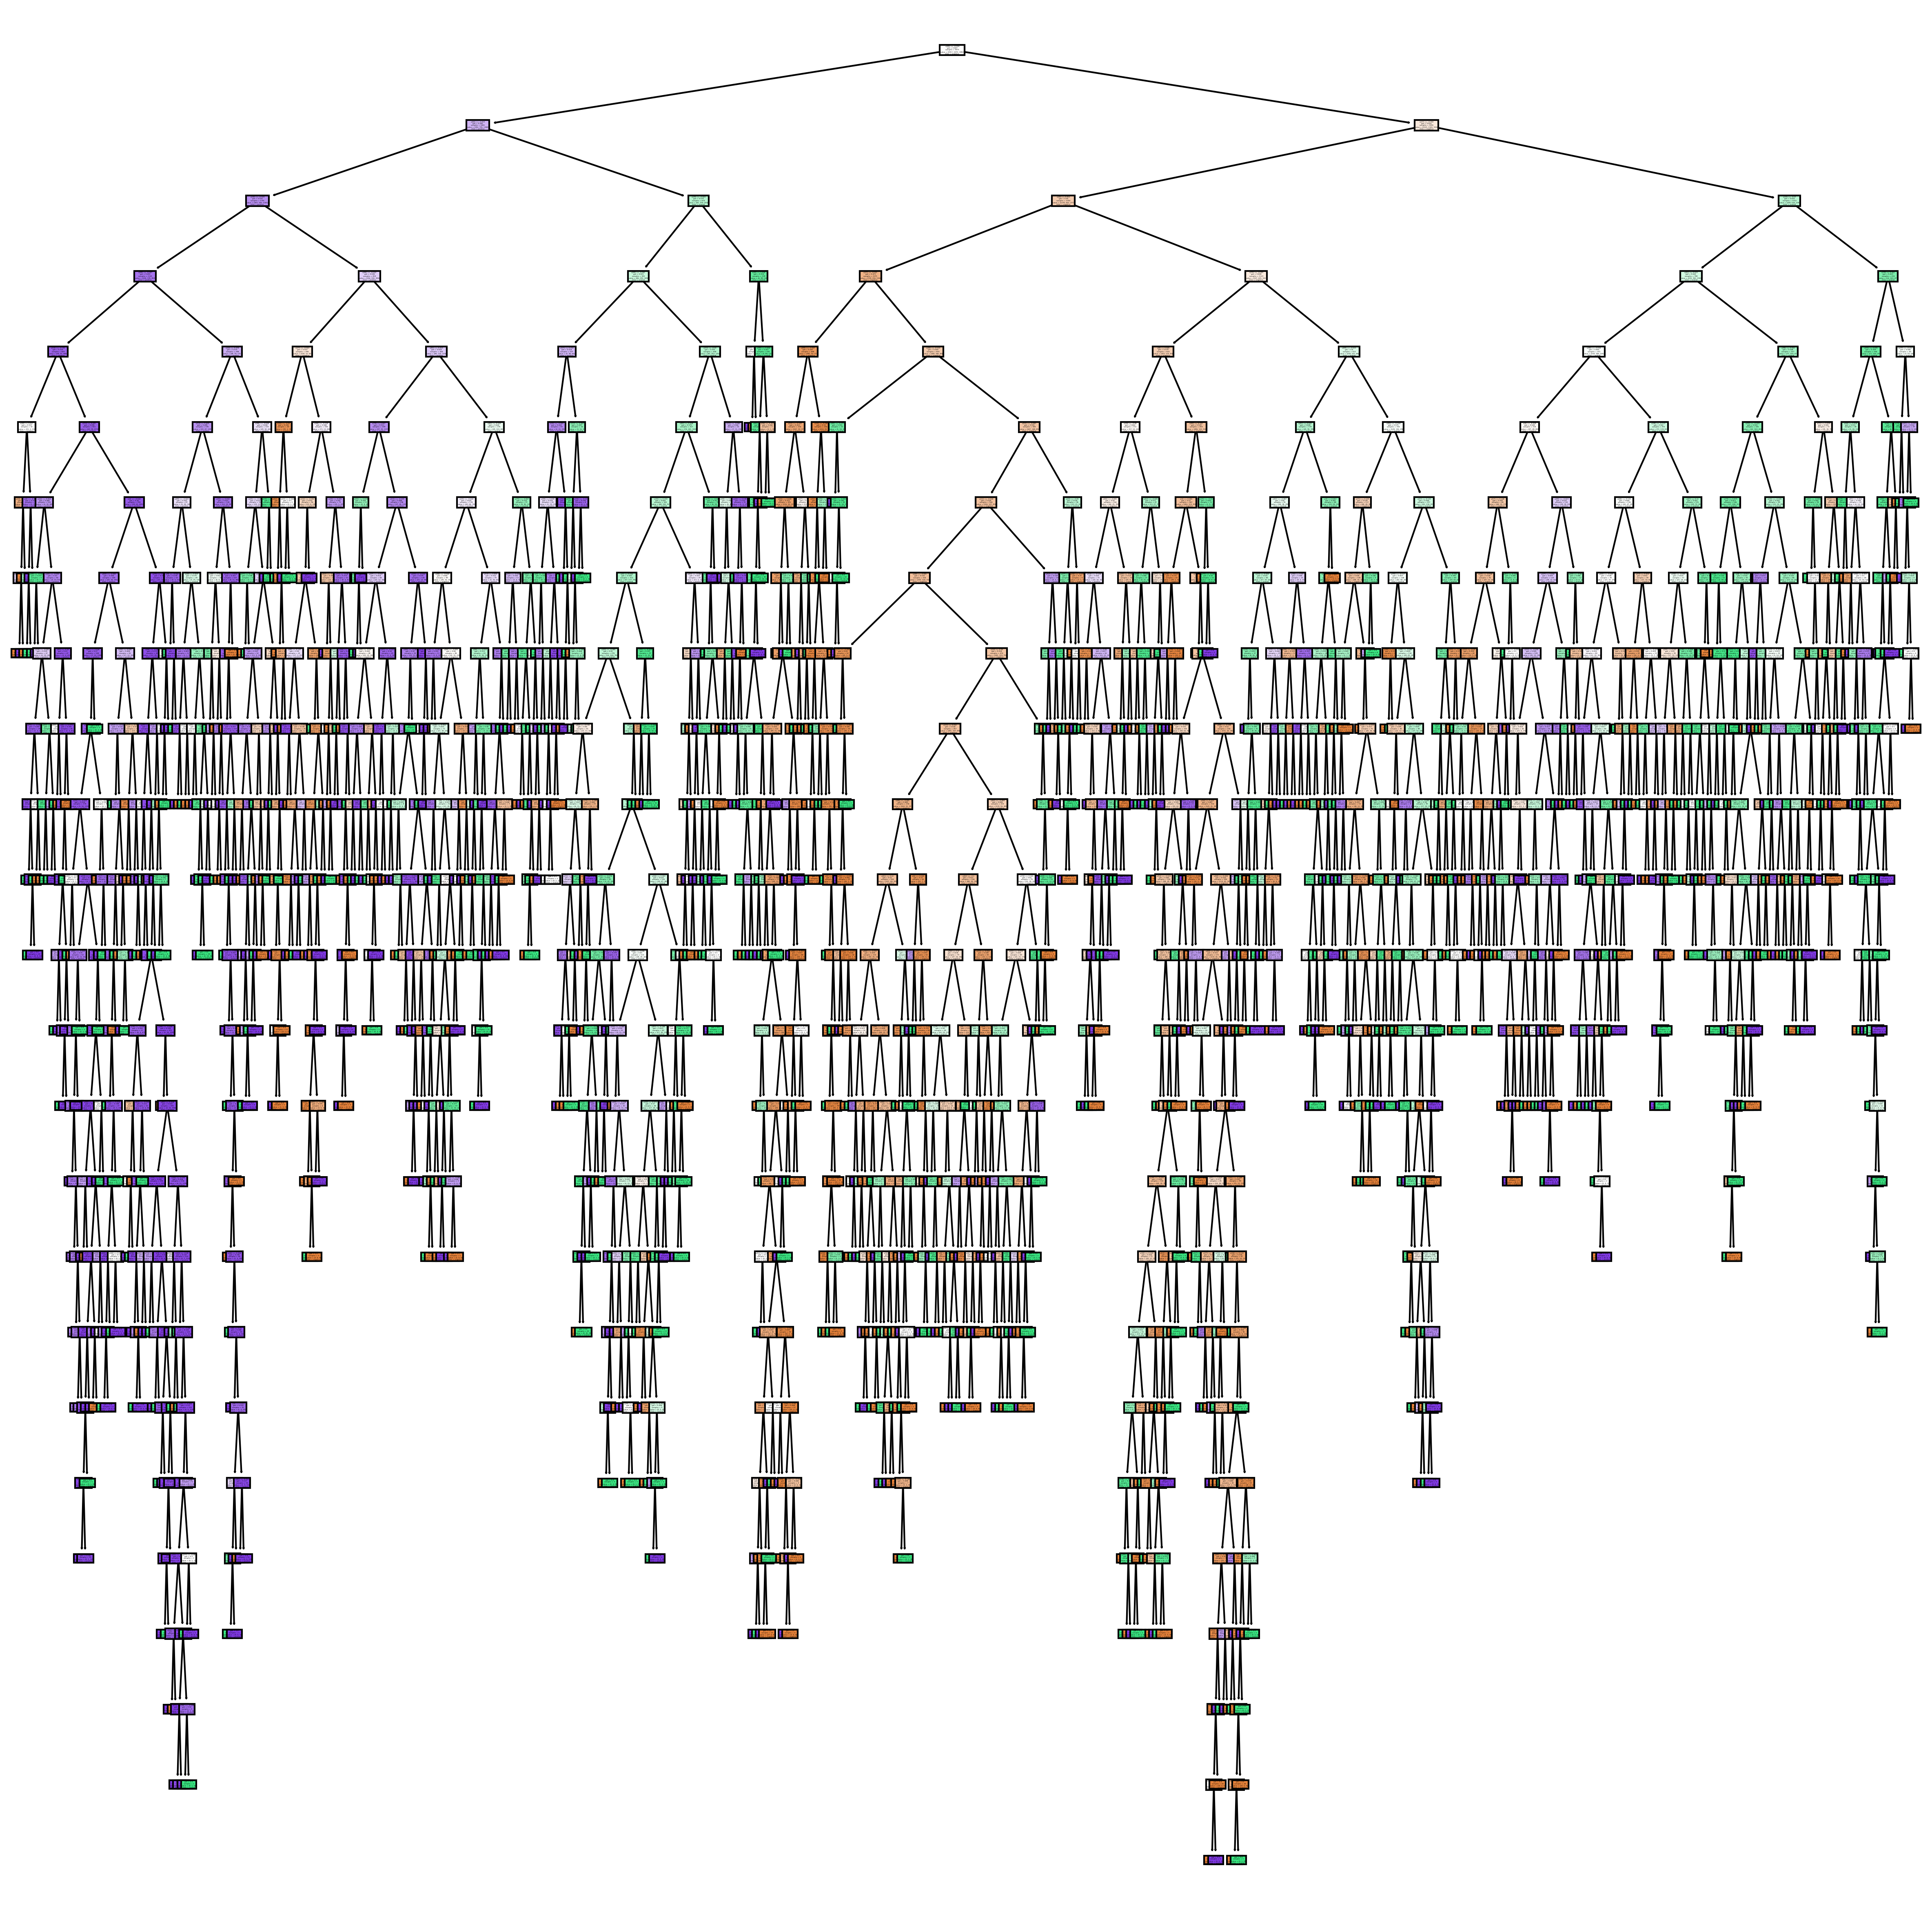

In [26]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dtre_model,filled=True
        ,class_names=['negative', 'neutral', 'positive'])
plt.show()

In [27]:
estimator =  DecisionTreeClassifier(random_state=True)

# Parameter & Values
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,24))}

# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

dtre_model_2 = model_hyprtu.best_estimator_  # directly created final dt model
# printing that value of measures
model_hyprtu.best_params_


{'criterion': 'gini', 'max_depth': 5}

In [28]:
dtre_model_2 = model_hyprtu.best_estimator_
dtre_model_2.fit(X_train,Y_train)

ypred_train= dtre_model_2.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train))

print('cv score : ',cross_val_score(dtre_model_2,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test= dtre_model_2.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test))

train_accuracy :  0.6295186034209134
cv score :  0.5886074788864805
test_accuracy :  0.5627644569816643


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

estimator =  RandomForestClassifier(random_state=True)

# Parameter & Values
param_grid = {'n_estimators':list(range(1,21))}

# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

ranfo_model = model_hyprtu.best_estimator_  # directly created final randomforest model
# printing that value of measures
model_hyprtu.best_params_


{'n_estimators': 20}

In [30]:
ranfo_model = model_hyprtu.best_estimator_
ranfo_model.fit(X_train,Y_train)

ypred_train= ranfo_model.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train))

print('cv score : ',cross_val_score(ranfo_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test= ranfo_model.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test))

train_accuracy :  0.9934755774995592
cv score :  0.6065928567543839
test_accuracy :  0.5937940761636107


# Adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

estimator =  AdaBoostClassifier(random_state=True)

# Parameter & Values
param_grid = {'n_estimators':list(range(1,25))}

# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

adabo_model = model_hyprtu.best_estimator_  # directly created final adabost model
# printing that value of measures
model_hyprtu.best_params_


{'n_estimators': 24}

In [32]:
adabo_model = model_hyprtu.best_estimator_
adabo_model.fit(X_train,Y_train)

ypred_train= adabo_model.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train))

print('cv score : ',cross_val_score(adabo_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test= adabo_model.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test))

train_accuracy :  0.6141773937577147
cv score :  0.5990104810075442
test_accuracy :  0.581805359661495


# XGBoost

In [ ]:
from xgboost import XGBClassifier

estimator =  XGBClassifier(random_state=True)

# Parameter & Values
param_grid = {'n_estimators':list(range(1,21)),
             'max_depth':list(range(1,21)),
             'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

# Function store in a variable(model_hyprtu)
model_hyprtu = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Calculate alpha_value acc to highest cv for the given data.
model_hyprtu.fit(X_train,Y_train)

xgb_model = model_hyprtu.best_estimator_  
# directly created final xgb model

# printing that value of measures
model_hyprtu.best_params_


In [ ]:
xgb_model = model_hyprtu.best_estimator_
xgb_model.fit(X_train,Y_train)

ypred_train= xgb_model.predict(X_train)
print('train_accuracy : ',accuracy_score(Y_train,ypred_train))

print('cv score : ',cross_val_score(xgb_model,X_train,Y_train,cv=5,scoring='accuracy').mean())

ypred_test= xgb_model.predict(X_test)
print('test_accuracy : ',accuracy_score(Y_test,ypred_test))

In [ ]:
import pickle
pickle.dump(svm_model,open('somi_sen_model.pkl','wb'))